In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

Time required: 0.008309602737426758


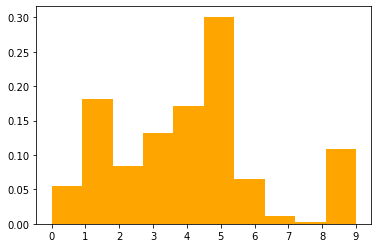

In [4]:
rng.current = 1

weigth = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weigth = weigth / weigth.sum()
bound = np.array([weigth[:i].sum() for i in range(1,11)])
result = np.arange(10)

start_time = time.time()
sample = np.array([result[np.searchsorted(bound, rng())] for i in range(1000)])
print("Time required: %s" % (time.time() - start_time))

plt.hist(sample, density = True, color = 'orange')
plt.xticks(np.arange(10))
plt.show()

Time required: 0.008487701416015625


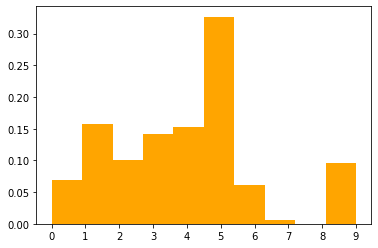

In [3]:
rng.current = 1
 
weigth = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
result = np.argsort(weigth)
weigth = weigth / weigth.sum()
bound = np.array([weigth[result[:i]].sum() for i in range(1,11)])
 
start_time = time.time()
sample = [result[np.searchsorted(bound, rng())] for i in range(1000)]
print("Time required: %s" % (time.time() - start_time))

plt.hist(sample, density=True, color = 'orange')
plt.xticks(np.arange(10))
plt.show()

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

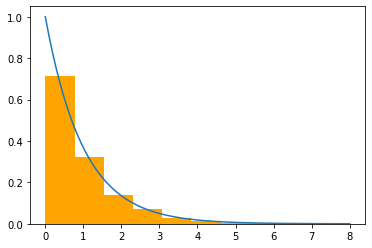

In [5]:
sample = [(-np.log(rng())) for i in range(1000)]

plt.hist(sample, color = 'orange', density = True)

a = np.linspace(0, 8, 256)
F = np.exp(-a)
plt.plot(a, F)

plt.show()

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

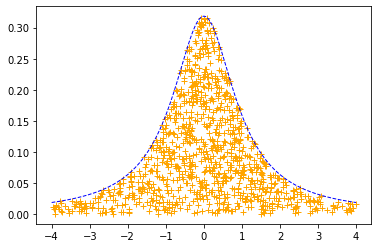

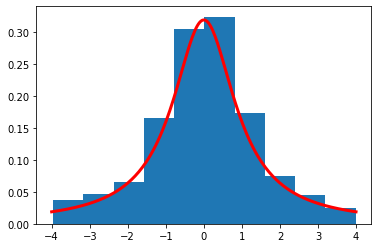

In [90]:
from scipy import stats
import numpy as np

random1 = [abs(rng() - 0.5) for i in range(1000)]
random2 = [8*(rng() - 0.5) for i in range(1000)]

sample1 = []
sample2 = []

while (len(sample1) < 1000):
    x = 8*(rng() - 0.5)
    y = abs(rng() - 0.5)
    if (y < 1 / np.pi / (1 + x**2)): 
        sample1.append(x)
        sample2.append(y)

#этот кусочек тут просто потому, что мне понравилась картинка
plt.scatter(sample1, sample2, marker = '+', color = 'orange', linewidth = 1)
plt.plot(np.linspace(-4, 4, 256), 1 / np.pi / (1 + np.linspace(-4, 4, 256)**2), color = 'blue',linewidth = 1, linestyle = '--')
plt.show()
#конец кусочка

plt.hist(sample1, density = True)
plt.plot(np.linspace(-4, 4, 256), 1 / np.pi / (1 + np.linspace(-4, 4, 256)**2), color = 'red',linewidth = 3, linestyle = '-')
plt.show()

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

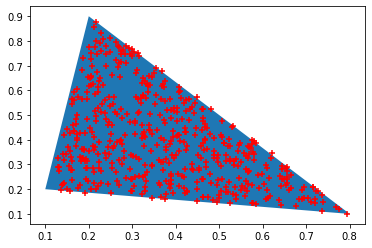

In [41]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

sample = np.array([[rng() for j in [0,1]] for i in range(500)])

for i in range(500):
    if sample[i,0] + sample[i,1] > 1:
       sample[i,0] = 1 - sample[i,0]
       sample[i,1] = 1 - sample[i,1]

rotation = np.array([[7 / 5 / np.sqrt(2), -1/5/np.sqrt(2)],[1 / 5 / np.sqrt(2), 7/5/np.sqrt(2)]])
sample = sample / np.sqrt(2) + 0.1 * np.array([0.8, 2.1])       #???!!!

sample = sample@rotation

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))

plt.scatter(sample[:,0], sample[:,1], marker = '+', color = 'red')

plt.show()

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

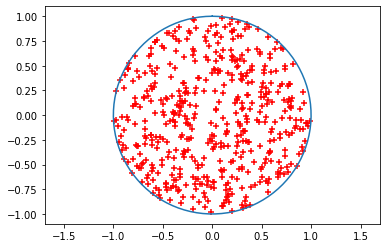

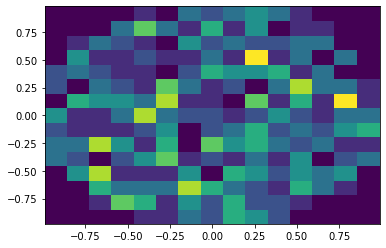

In [47]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

sample = np.array([[rng(), rng()] for i in range(500)])

for i in range(500):
    sample[i,:] = (np.sqrt(sample[i,0]) * np.array([np.sin(2*np.pi*sample[i,1]),np.cos(2*np.pi*sample[i,1])]))


plt.scatter(sample[:,0], sample[:,1], marker = '+', color = 'red')

plt.show()

plt.hist2d(sample[:,0], sample[:,1], bins = 15)
plt.show()

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

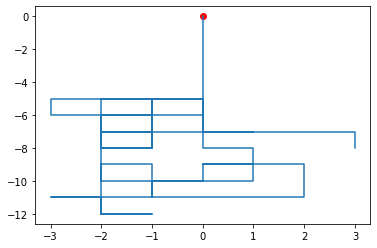

In [43]:
sample = [4*rng() for i in range(100)]

trajectory = np.zeros((len(sample), 2))

for i in range(1,len(sample)):
    if sample[i] > 3:
        trajectory[i, :] = trajectory[i-1,:] + np.array([1, 0])
    if sample[i] > 2 and sample[i] <= 3:
        trajectory[i, :] = trajectory[i-1,:] + np.array([0, 1])
    if sample[i] > 1 and sample[i] <= 2:
        trajectory[i, :] = trajectory[i-1,:] + np.array([-1, 0])
    if sample[i] <= 1:
        trajectory[i, :] = trajectory[i-1,:] + np.array([0, -1])


plt.plot(trajectory[:,0], trajectory[:,1])
plt.scatter(0,0, color = 'red')
plt.show()